# Objectives

 - Visualize individual feature patterns
 - Run descriptive statistical analysis on the dataset
 - Use groups and pivot tables to find the effect of categorical variables on price
 - Use Pearson Correlation to measure the interdependence between variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
filepath = "https://drive.google.com/uc?export=download&id=1eqztnFwnHZgXSpQuNqzF9rjFfi4MsbR9"
df = pd.read_csv(filepath)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

In [4]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Visualize individual feature patterns

### Continuous valued features
Regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also the value of correlation of each feature with "Price".

<Axes: xlabel='CPU_frequency', ylabel='Price'>

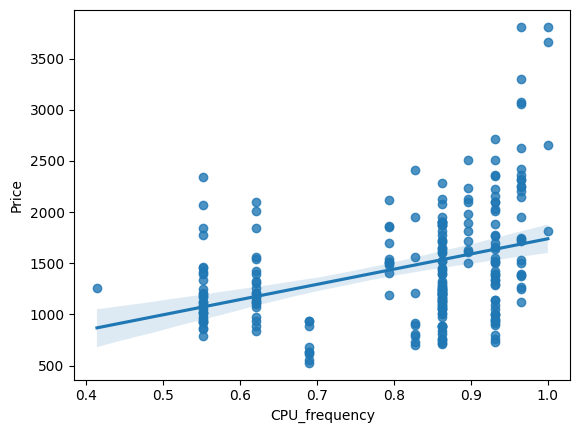

In [5]:
# CPU_frequency plot
sns.regplot(x='CPU_frequency', y='Price', data=df)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

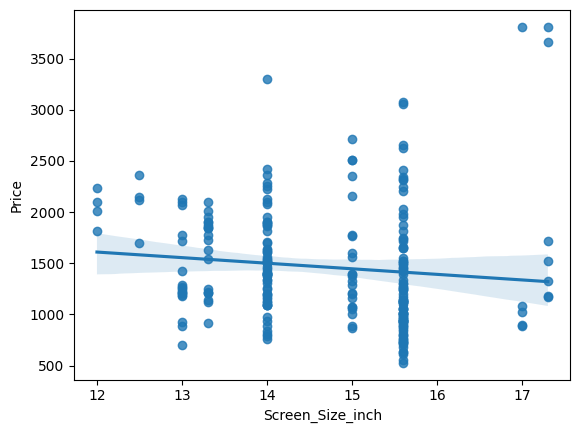

In [6]:
# Screen_Size_inch plot
sns.regplot(x='Screen_Size_inch', y='Price', data=df)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

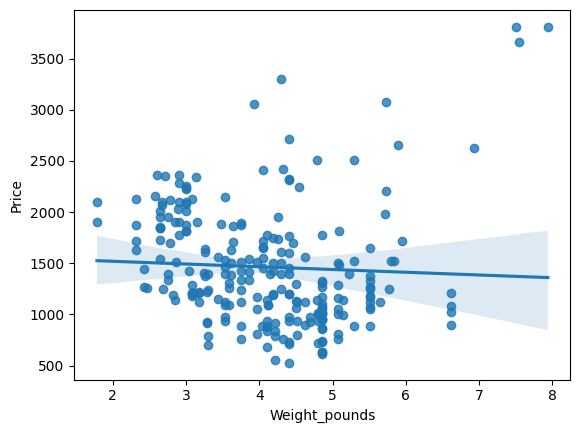

In [7]:
# Weight_pounds plot
sns.regplot(x='Weight_pounds', y='Price', data=df)

In [11]:
# Correlation values of the three attributes with Price
for param in ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']:
    print(f"Correlation of Price and {param} is ") 
    print(df[[param, 'Price']].corr())
    print("")

Correlation of Price and CPU_frequency is 
               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000

Correlation of Price and Screen_Size_inch is 
                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000

Correlation of Price and Weight_pounds is 
               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000



### Categorical features
Box plots for the different features that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

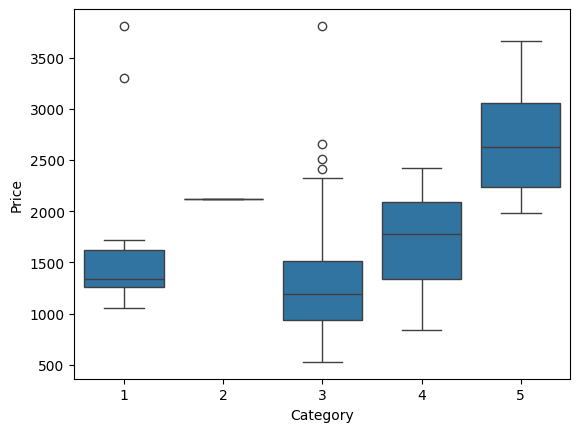

In [12]:
# Category Box plot
sns.boxplot(x='Category', y='Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

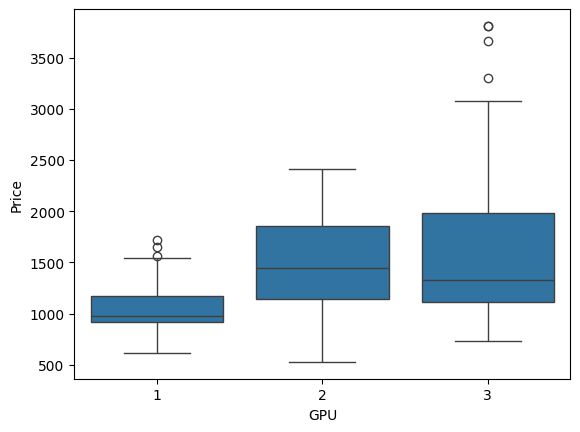

In [13]:
# GPU Box plot
sns.boxplot(x='GPU', y='Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

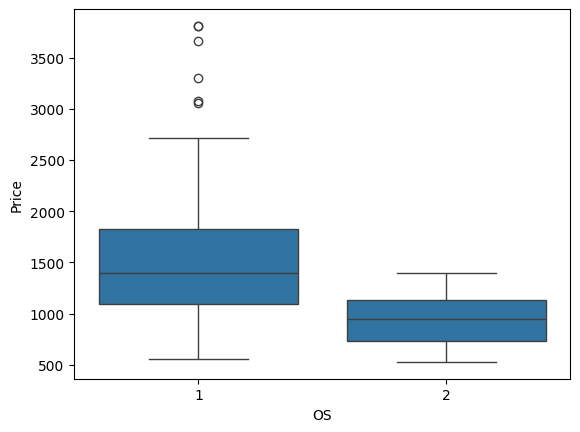

In [14]:
# OS Box plot
sns.boxplot(x='OS', y='Price', data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

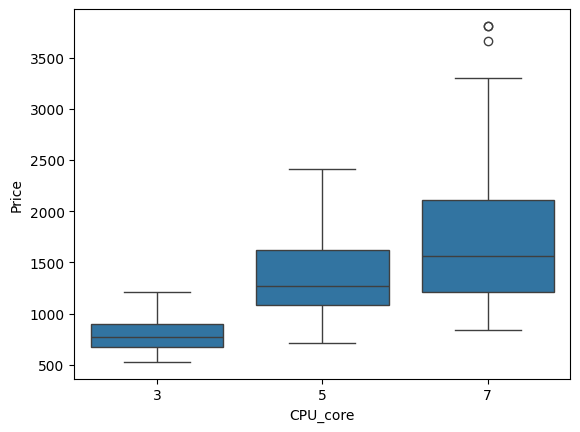

In [15]:
# CPU_core Box plot
sns.boxplot(x='CPU_core', y='Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

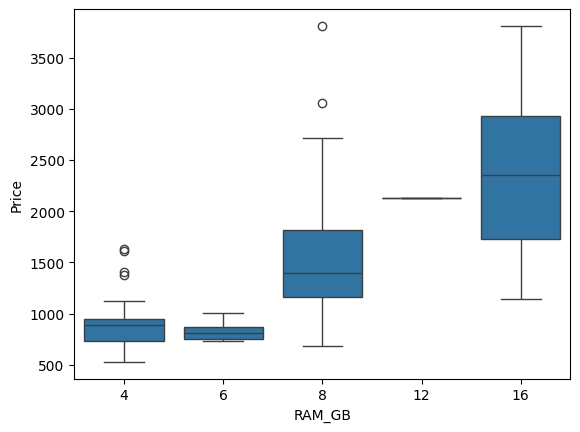

In [16]:
# RAM_GB Box plot
sns.boxplot(x='RAM_GB', y='Price', data=df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

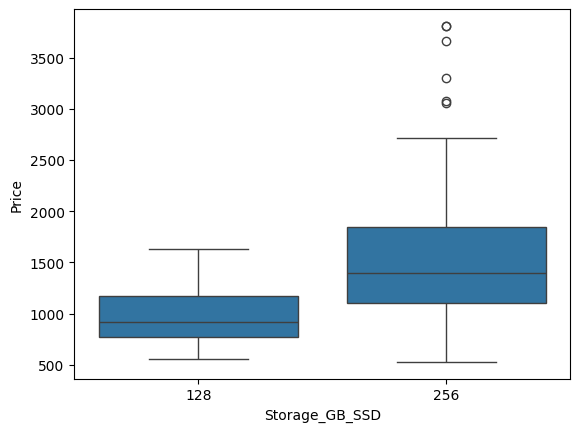

In [17]:
# Storage_GB_SSD Box plot
sns.boxplot(x='Storage_GB_SSD', y='Price', data=df)

# Descriptive Statistical Analysis

The statistical description of all the features being used in the data set

In [19]:
print(df.describe().T)
print(df.describe(include = 'object').T) # type: ignore

                  count         mean         std         min          25%  \
Unnamed: 0.1      238.0   118.500000   68.848868    0.000000    59.250000   
Unnamed: 0        238.0   118.500000   68.848868    0.000000    59.250000   
Category          238.0     3.205882    0.776533    1.000000     3.000000   
GPU               238.0     2.151261    0.638282    1.000000     2.000000   
OS                238.0     1.058824    0.235790    1.000000     1.000000   
CPU_core          238.0     5.630252    1.241787    3.000000     5.000000   
Screen_Size_inch  238.0    14.688655    1.166045   12.000000    14.000000   
CPU_frequency     238.0     0.813822    0.141860    0.413793     0.689655   
RAM_GB            238.0     7.882353    2.482603    4.000000     8.000000   
Storage_GB_SSD    238.0   245.781513   34.765316  128.000000   256.000000   
Weight_pounds     238.0     4.106221    1.078442    1.786050     3.246863   
Price             238.0  1462.344538  574.607699  527.000000  1066.500000   

# GroupBy and Pivot Tables

Grouping the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection


In [20]:
# Create the group
df_gptest = df[['GPU', 'CPU_core', 'Price']]
grouped_test1 = df_gptest.groupby(['GPU', 'CPU_core'], as_index=False).mean()

In [21]:
# Create the Pivot table
grouped_pivot = grouped_test1.pivot(index='GPU', columns='CPU_core')

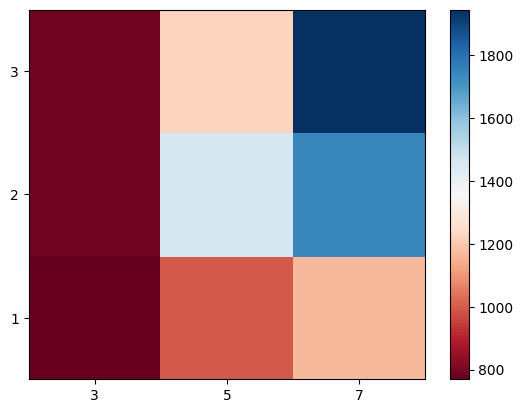

In [22]:
# Create the Plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1] # type: ignore
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

# Pearson Correlation and p-values

Using the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This helps to determine the parameters most likely to have a strong effect on the price of the laptops.

In [23]:
from scipy.stats import pearsonr

for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print("The Pearson Correlation Coefficient for ", param, " is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient for  RAM_GB  is 0.5492972971857841  with a P-value of P =  3.681560628842973e-20
The Pearson Correlation Coefficient for  CPU_frequency  is 0.36666555892588615  with a P-value of P =  5.502463350713219e-09
The Pearson Correlation Coefficient for  Storage_GB_SSD  is 0.24342075521810302  with a P-value of P =  0.00014898923191723976
The Pearson Correlation Coefficient for  Screen_Size_inch  is -0.11064420817118273  with a P-value of P =  0.0885339784683062
The Pearson Correlation Coefficient for  Weight_pounds  is -0.05031225837751551  with a P-value of P =  0.43976938534338894
The Pearson Correlation Coefficient for  CPU_core  is 0.4593977773355115  with a P-value of P =  7.912950127009359e-14
The Pearson Correlation Coefficient for  OS  is -0.22172980114827384  with a P-value of P =  0.000569664255924674
The Pearson Correlation Coefficient for  GPU  is 0.28829819888814273  with a P-value of P =  6.166949698364437e-06
The Pearson Correlation Coefficie